In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [12]:
def get_data():
    df = pd.read_csv('shm_data/tension.csv')
    x_train = list(df.values)
    x_train.pop(0)
    x_train = np.array(x_train)
    
    mean = x_train.mean()
    std = x_train.std()
    
    x_train = (x_train - mean) / std
    
    y_train = np.array([i for i in range(40) for j in range(100)])
    
    print(x_train.shape, y_train.shape)
    
    return x_train, y_train, mean, std

In [13]:
def construct_model():
    model = Sequential([
            Flatten(input_shape=(40,)),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(40, activation='softmax'),
        ])
        
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [14]:
def training_model(iteration, epochs, batch_size, shuffle):
    weights_list = []
    
    for i in range(iteration):
        print('Iteration {}'.format(i+1))
        
        model = construct_model()
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=shuffle, verbose=0)
        
        weights = model.get_weights()
        weights_list.append(weights[-1])
        
    return weights_list

In [15]:
x_train, y_train, mean, std = get_data()
weights_list = training_model(iteration=10, epochs=200, batch_size=100, shuffle=True)

(4000, 40) (4000,)
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


In [ ]:
df = pd.read_csv('shm_data/tension.csv')
df

In [ ]:
x_train = list(df.values)
x_train.pop(0)
x_train = np.array(x_train)
x_train.shape

In [ ]:
x_train = x_train.reshape(40, 100, 40)
x_train.shape

In [ ]:
x_train_n = []
for i in range(40):
    x_t = []
    x = x_train[i]
    for j in range(100):
        if j <= 100 * (1-0.7):
            continue
        else:
            x_t.append(x[j])
    x_train_n.append(x_t)
x_train_n = np.array(x_train_n)
x_train_n.shape

In [16]:
weights_list

[array([-0.04119097,  0.02489094, -0.04780524, -0.02375691,  0.01873469,
         0.03120396, -0.02477197,  0.03349248,  0.01297017,  0.00907174,
        -0.06392304,  0.01685728, -0.00293588, -0.0469497 ,  0.06408267,
        -0.01608088,  0.02153141, -0.01966656, -0.00097039, -0.0482714 ,
        -0.03761243, -0.00925475,  0.05874425, -0.02727704, -0.0081293 ,
         0.0341215 ,  0.00139486, -0.01057978,  0.00048184, -0.04852741,
        -0.00456057, -0.03734653, -0.00185084,  0.03262501, -0.01126363,
         0.02695779, -0.00556037,  0.00079134, -0.04124735, -0.00171358],
       dtype=float32),
 array([-0.04344984,  0.00344453, -0.0596316 ,  0.05260874, -0.03269802,
         0.02344026, -0.01157217,  0.02068881, -0.01147716, -0.00903669,
        -0.03282809,  0.00872796, -0.04284721, -0.01802154,  0.0278343 ,
         0.03642112, -0.03261114, -0.04024865, -0.03182524, -0.02712537,
        -0.00436627, -0.045731  ,  0.03844896, -0.01550497, -0.03118487,
        -0.00262586,  0.043

In [17]:
wei_list = []
for i, weights in enumerate(weights_list):
    w_list = list(weights)
    w_list.sort(reverse=True)
    
    w_list2 = list(weights)
    
    print('Epoch {}'.format(i+1))
    we_list = []
    for i in range(len(weights)):
        we_list.append(w_list2.index(w_list[i]))
        print(w_list2.index(w_list[i]), end = ' ')
    print('')
    wei_list.append(we_list)
len(wei_list[0])

Epoch 1
14 22 25 7 33 5 35 1 16 4 11 8 9 26 37 28 18 39 32 12 30 36 24 21 27 34 15 17 3 6 23 31 20 0 38 13 2 19 29 10 
Epoch 2
31 38 35 3 26 22 15 36 14 5 7 11 34 1 33 25 20 39 9 8 6 30 23 13 19 27 28 24 18 16 4 10 29 17 12 0 21 32 2 37 
Epoch 3
1 14 24 15 33 6 25 27 35 21 5 12 4 20 7 11 19 10 26 16 39 23 22 29 31 2 18 30 8 3 28 17 38 36 0 37 13 32 34 9 
Epoch 4
25 8 3 14 23 13 5 29 35 9 24 34 37 26 0 31 6 4 39 15 32 30 1 7 27 2 38 21 33 36 18 22 17 10 19 11 16 20 28 12 
Epoch 5
1 21 29 9 23 25 15 13 16 26 5 38 34 35 8 7 36 24 14 0 28 4 3 18 2 20 30 12 11 19 31 27 22 10 32 33 37 39 6 17 
Epoch 6
31 9 39 35 33 14 21 5 8 0 26 2 23 10 25 16 11 15 34 30 6 36 12 20 38 3 24 27 4 17 7 29 19 28 32 13 37 22 1 18 
Epoch 7
6 30 35 15 23 12 14 24 9 34 25 1 5 19 26 3 11 33 13 20 31 18 0 4 16 39 29 36 27 21 10 2 8 7 32 37 38 28 22 17 
Epoch 8
0 35 29 16 4 11 25 33 5 14 1 30 3 27 32 21 34 37 13 2 8 26 24 19 9 17 10 23 15 22 28 36 7 6 39 12 18 20 38 31 
Epoch 9
35 25 34 21 4 23 30 31 29 26 0 18 8 5 12

40

In [18]:
wei_list

[[14,
  22,
  25,
  7,
  33,
  5,
  35,
  1,
  16,
  4,
  11,
  8,
  9,
  26,
  37,
  28,
  18,
  39,
  32,
  12,
  30,
  36,
  24,
  21,
  27,
  34,
  15,
  17,
  3,
  6,
  23,
  31,
  20,
  0,
  38,
  13,
  2,
  19,
  29,
  10],
 [31,
  38,
  35,
  3,
  26,
  22,
  15,
  36,
  14,
  5,
  7,
  11,
  34,
  1,
  33,
  25,
  20,
  39,
  9,
  8,
  6,
  30,
  23,
  13,
  19,
  27,
  28,
  24,
  18,
  16,
  4,
  10,
  29,
  17,
  12,
  0,
  21,
  32,
  2,
  37],
 [1,
  14,
  24,
  15,
  33,
  6,
  25,
  27,
  35,
  21,
  5,
  12,
  4,
  20,
  7,
  11,
  19,
  10,
  26,
  16,
  39,
  23,
  22,
  29,
  31,
  2,
  18,
  30,
  8,
  3,
  28,
  17,
  38,
  36,
  0,
  37,
  13,
  32,
  34,
  9],
 [25,
  8,
  3,
  14,
  23,
  13,
  5,
  29,
  35,
  9,
  24,
  34,
  37,
  26,
  0,
  31,
  6,
  4,
  39,
  15,
  32,
  30,
  1,
  7,
  27,
  2,
  38,
  21,
  33,
  36,
  18,
  22,
  17,
  10,
  19,
  11,
  16,
  20,
  28,
  12],
 [1,
  21,
  29,
  9,
  23,
  25,
  15,
  13,
  16,
  26,
  5,
  38,
  34,
 

In [26]:
scores = [0 for i in range(40)]
scores

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [27]:
for weights in wei_list:
    score = 40
    for w in weights:
        scores[w] += score
        score -= 1
scores

[221,
 275,
 125,
 207,
 252,
 312,
 209,
 213,
 222,
 240,
 115,
 216,
 163,
 171,
 306,
 246,
 211,
 71,
 164,
 130,
 150,
 222,
 164,
 241,
 213,
 339,
 269,
 161,
 132,
 230,
 224,
 224,
 114,
 238,
 231,
 353,
 147,
 138,
 160,
 181]

In [28]:
score_dic = {}
for i, score in enumerate(scores):
    score_dic[i] = score
score_dic

{0: 221,
 1: 275,
 2: 125,
 3: 207,
 4: 252,
 5: 312,
 6: 209,
 7: 213,
 8: 222,
 9: 240,
 10: 115,
 11: 216,
 12: 163,
 13: 171,
 14: 306,
 15: 246,
 16: 211,
 17: 71,
 18: 164,
 19: 130,
 20: 150,
 21: 222,
 22: 164,
 23: 241,
 24: 213,
 25: 339,
 26: 269,
 27: 161,
 28: 132,
 29: 230,
 30: 224,
 31: 224,
 32: 114,
 33: 238,
 34: 231,
 35: 353,
 36: 147,
 37: 138,
 38: 160,
 39: 181}

In [29]:
res = sorted(score_dic.items(), key=(lambda x:x[1]), reverse=True)
res

[(35, 353),
 (25, 339),
 (5, 312),
 (14, 306),
 (1, 275),
 (26, 269),
 (4, 252),
 (15, 246),
 (23, 241),
 (9, 240),
 (33, 238),
 (34, 231),
 (29, 230),
 (30, 224),
 (31, 224),
 (8, 222),
 (21, 222),
 (0, 221),
 (11, 216),
 (7, 213),
 (24, 213),
 (16, 211),
 (6, 209),
 (3, 207),
 (39, 181),
 (13, 171),
 (18, 164),
 (22, 164),
 (12, 163),
 (27, 161),
 (38, 160),
 (20, 150),
 (36, 147),
 (37, 138),
 (28, 132),
 (19, 130),
 (2, 125),
 (10, 115),
 (32, 114),
 (17, 71)]

In [25]:
dic_list = []
for weights in wei_list:
    weights_dic = {}
    for i, w in enumerate(weights):
        weights_dic[i] = w
    dic_list.append(weights_dic)
dic_list

[{0: 14,
  1: 22,
  2: 25,
  3: 7,
  4: 33,
  5: 5,
  6: 35,
  7: 1,
  8: 16,
  9: 4,
  10: 11,
  11: 8,
  12: 9,
  13: 26,
  14: 37,
  15: 28,
  16: 18,
  17: 39,
  18: 32,
  19: 12,
  20: 30,
  21: 36,
  22: 24,
  23: 21,
  24: 27,
  25: 34,
  26: 15,
  27: 17,
  28: 3,
  29: 6,
  30: 23,
  31: 31,
  32: 20,
  33: 0,
  34: 38,
  35: 13,
  36: 2,
  37: 19,
  38: 29,
  39: 10},
 {0: 31,
  1: 38,
  2: 35,
  3: 3,
  4: 26,
  5: 22,
  6: 15,
  7: 36,
  8: 14,
  9: 5,
  10: 7,
  11: 11,
  12: 34,
  13: 1,
  14: 33,
  15: 25,
  16: 20,
  17: 39,
  18: 9,
  19: 8,
  20: 6,
  21: 30,
  22: 23,
  23: 13,
  24: 19,
  25: 27,
  26: 28,
  27: 24,
  28: 18,
  29: 16,
  30: 4,
  31: 10,
  32: 29,
  33: 17,
  34: 12,
  35: 0,
  36: 21,
  37: 32,
  38: 2,
  39: 37},
 {0: 1,
  1: 14,
  2: 24,
  3: 15,
  4: 33,
  5: 6,
  6: 25,
  7: 27,
  8: 35,
  9: 21,
  10: 5,
  11: 12,
  12: 4,
  13: 20,
  14: 7,
  15: 11,
  16: 19,
  17: 10,
  18: 26,
  19: 16,
  20: 39,
  21: 23,
  22: 22,
  23: 29,
  24: 31,
  2

In [19]:
scores = [0 for i in range(40)]
scores

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [20]:
for weights in wei_list:
    score = 40
    for w in weights:
        scores[w] += score
        score -= 1
scores

[221,
 275,
 125,
 207,
 252,
 312,
 209,
 213,
 222,
 240,
 115,
 216,
 163,
 171,
 306,
 246,
 211,
 71,
 164,
 130,
 150,
 222,
 164,
 241,
 213,
 339,
 269,
 161,
 132,
 230,
 224,
 224,
 114,
 238,
 231,
 353,
 147,
 138,
 160,
 181]

In [21]:
scores.index(max(scores))

35

In [22]:
importance = []
temp = list(scores)
temp.sort(reverse=True)

for i in range(40):
    importance.append(scores.index(temp[i]))
importance

[35,
 25,
 5,
 14,
 1,
 26,
 4,
 15,
 23,
 9,
 33,
 34,
 29,
 30,
 30,
 8,
 8,
 0,
 11,
 7,
 7,
 16,
 6,
 3,
 39,
 13,
 18,
 18,
 12,
 27,
 38,
 20,
 36,
 37,
 28,
 19,
 2,
 10,
 32,
 17]

In [27]:
x_train, y_train, mean, std = get_data()

(4000, 40) (4000,)


In [35]:
def get_data_importance(importance):
    x_temp = []
    for x in x_train:
        t = []
        for imp in importance:
            t.append(x[imp])
        x_temp.append(t)
    x_temp = np.array(x_temp)
    print(x_temp.shape)
    return x_temp

In [37]:
def construct_model_importance(shape):
    model = Sequential([
            Flatten(input_shape=(shape,)),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(40, activation='softmax'),
        ])
        
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [39]:
accuracy_list = []
for i in range(40):
    imp = importance[:i+1]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list.append(history.history['accuracy'][-1])

(4000, 1)
(4000, 2)
(4000, 3)
(4000, 4)
(4000, 5)
(4000, 6)
(4000, 7)
(4000, 8)
(4000, 9)
(4000, 10)
(4000, 11)
(4000, 12)
(4000, 13)
(4000, 14)
(4000, 15)
(4000, 16)
(4000, 17)
(4000, 18)
(4000, 19)
(4000, 20)
(4000, 21)
(4000, 22)
(4000, 23)
(4000, 24)
(4000, 25)
(4000, 26)
(4000, 27)
(4000, 28)
(4000, 29)
(4000, 30)


KeyboardInterrupt: 

In [ ]:
plt.plot(accuracy_list)

In [40]:
w_list = [[] for i in range(40)]

In [42]:
weights_list

[array([-0.02408485, -0.00312508,  0.05466631, -0.03117749,  0.00301618,
        -0.02341594, -0.00759651, -0.03399743,  0.00517664, -0.01396029,
        -0.00772257, -0.00327449, -0.01080434,  0.02195981, -0.01713275,
         0.04394803, -0.03854491,  0.00364654,  0.00293115,  0.02966111,
        -0.00579016,  0.00874599, -0.01679543, -0.01631851,  0.00337482,
         0.03287181, -0.00763882, -0.00521622, -0.00075603, -0.05315427,
         0.02665423,  0.01371485,  0.02483115, -0.01069663,  0.00906049,
         0.01991134,  0.0029296 , -0.01813606, -0.02299633,  0.00719841],
       dtype=float32),
 array([-0.00556192, -0.04019361,  0.00714477, -0.00371289, -0.03552204,
         0.00382267, -0.01705111, -0.01112733, -0.02842087, -0.03236688,
         0.01204518,  0.04650738, -0.02788004, -0.01538616,  0.0196287 ,
         0.05624643, -0.01093492, -0.02557082, -0.01443079,  0.01000016,
        -0.02185105,  0.0071761 , -0.02860092,  0.02762432, -0.03809059,
         0.0059665 , -0.005

In [47]:
for weights in weights_list:
    for i, w in enumerate(weights):
        w_list[i].append(w)

means = []
for w in w_list:
    w = np.array(w)
    means.append(w.mean())
means

[-0.011272932,
 -0.009085632,
 -0.0037507128,
 -0.004758057,
 0.005951352,
 0.022763181,
 0.0008446796,
 -0.026731668,
 -0.0119988145,
 -0.00019381095,
 -0.011562445,
 -0.0021027618,
 -0.000605267,
 -0.012092607,
 -0.0014146187,
 0.034702826,
 -0.025537388,
 -0.019665515,
 -0.0023161056,
 -0.0044363094,
 -0.013238759,
 0.0011512971,
 -0.0049655237,
 -0.012288503,
 0.017920543,
 0.01737625,
 0.016210346,
 -0.020610042,
 -0.02689588,
 -0.0069780033,
 -0.0076809404,
 -0.002303662,
 0.0026089146,
 -0.009258083,
 -0.0008644789,
 0.010022133,
 -0.005289143,
 -0.021603037,
 -0.01880377,
 0.005548917]

In [48]:
mean_imp = []
temp = list(means)
temp.sort(reverse=True)

for i in range(40):
    mean_imp.append(means.index(temp[i]))
mean_imp

[15,
 5,
 24,
 25,
 26,
 35,
 4,
 39,
 32,
 21,
 6,
 9,
 12,
 34,
 14,
 11,
 31,
 18,
 2,
 19,
 3,
 22,
 36,
 29,
 30,
 1,
 33,
 0,
 10,
 8,
 13,
 23,
 20,
 38,
 17,
 27,
 37,
 16,
 7,
 28]

In [50]:
accuracy_list = []
history_list = []
for i in range(40):
    imp = importance[:i+1]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list.append(history.history['accuracy'][-1])
    history_list.append(history)

(4000, 1)
(4000, 2)
(4000, 3)
(4000, 4)
(4000, 5)
(4000, 6)
(4000, 7)
(4000, 8)
(4000, 9)
(4000, 10)
(4000, 11)
(4000, 12)
(4000, 13)
(4000, 14)
(4000, 15)
(4000, 16)
(4000, 17)
(4000, 18)
(4000, 19)
(4000, 20)
(4000, 21)
(4000, 22)
(4000, 23)
(4000, 24)
(4000, 25)
(4000, 26)
(4000, 27)
(4000, 28)
(4000, 29)
(4000, 30)
(4000, 31)
(4000, 32)
(4000, 33)
(4000, 34)
(4000, 35)
(4000, 36)
(4000, 37)
(4000, 38)
(4000, 39)
(4000, 40)


In [54]:
accuracy_list2 = []
history_list2 = []
for i in range(40):
    imp = mean_imp[:i+1]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list2.append(history.history['accuracy'][-1])
    history_list2.append(history)

(4000, 1)
(4000, 2)
(4000, 3)
(4000, 4)
(4000, 5)
(4000, 6)
(4000, 7)
(4000, 8)
(4000, 9)
(4000, 10)
(4000, 11)
(4000, 12)
(4000, 13)
(4000, 14)
(4000, 15)
(4000, 16)
(4000, 17)
(4000, 18)
(4000, 19)
(4000, 20)
(4000, 21)
(4000, 22)
(4000, 23)
(4000, 24)
(4000, 25)
(4000, 26)
(4000, 27)
(4000, 28)
(4000, 29)
(4000, 30)
(4000, 31)
(4000, 32)
(4000, 33)
(4000, 34)
(4000, 35)
(4000, 36)
(4000, 37)
(4000, 38)
(4000, 39)
(4000, 40)


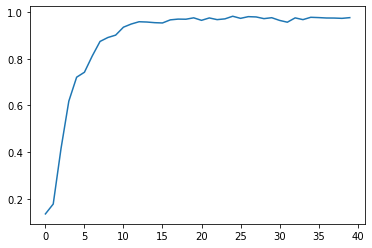

In [52]:
plt.plot(accuracy_list)

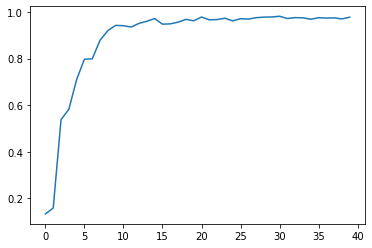

In [55]:
plt.plot(accuracy_list2)

In [56]:
accuracy_list3 = []
history_list3 = []
importance.reverse()
for i in range(40):
    imp = importance[:i+1]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list3.append(history.history['accuracy'][-1])
    history_list3.append(history)

(4000, 1)
(4000, 2)
(4000, 3)
(4000, 4)
(4000, 5)
(4000, 6)
(4000, 7)
(4000, 8)
(4000, 9)
(4000, 10)
(4000, 11)
(4000, 12)
(4000, 13)
(4000, 14)
(4000, 15)
(4000, 16)
(4000, 17)
(4000, 18)
(4000, 19)
(4000, 20)
(4000, 21)
(4000, 22)
(4000, 23)
(4000, 24)
(4000, 25)
(4000, 26)
(4000, 27)
(4000, 28)
(4000, 29)
(4000, 30)
(4000, 31)
(4000, 32)
(4000, 33)
(4000, 34)
(4000, 35)
(4000, 36)
(4000, 37)
(4000, 38)
(4000, 39)
(4000, 40)


In [57]:
accuracy_list4 = []
history_list4 = []
mean_imp.reverse()
for i in range(40):
    imp = mean_imp[:i+1]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list4.append(history.history['accuracy'][-1])
    history_list4.append(history)

(4000, 1)
(4000, 2)
(4000, 3)
(4000, 4)
(4000, 5)
(4000, 6)
(4000, 7)
(4000, 8)
(4000, 9)
(4000, 10)
(4000, 11)
(4000, 12)
(4000, 13)
(4000, 14)
(4000, 15)
(4000, 16)
(4000, 17)
(4000, 18)
(4000, 19)
(4000, 20)
(4000, 21)
(4000, 22)
(4000, 23)
(4000, 24)
(4000, 25)
(4000, 26)
(4000, 27)
(4000, 28)
(4000, 29)
(4000, 30)
(4000, 31)
(4000, 32)
(4000, 33)
(4000, 34)
(4000, 35)
(4000, 36)
(4000, 37)
(4000, 38)
(4000, 39)
(4000, 40)


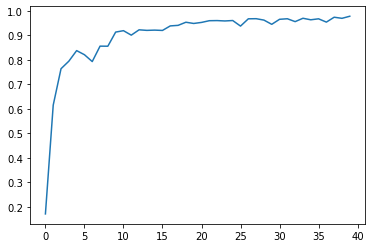

In [58]:
plt.plot(accuracy_list3)

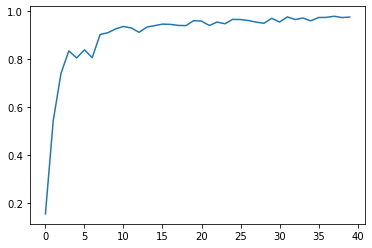

In [59]:
plt.plot(accuracy_list4)

In [60]:
accuracy_list

[0.13600000739097595,
 0.1782499998807907,
 0.41574999690055847,
 0.6184999942779541,
 0.7207499742507935,
 0.7419999837875366,
 0.8115000128746033,
 0.8737499713897705,
 0.890500009059906,
 0.9007499814033508,
 0.9347500205039978,
 0.9482499957084656,
 0.9580000042915344,
 0.9567499756813049,
 0.9539999961853027,
 0.952750027179718,
 0.9660000205039978,
 0.9692500233650208,
 0.96875,
 0.9747499823570251,
 0.9639999866485596,
 0.9742500185966492,
 0.9670000076293945,
 0.9702500104904175,
 0.9815000295639038,
 0.9725000262260437,
 0.9797499775886536,
 0.9785000085830688,
 0.9712499976158142,
 0.9752500057220459,
 0.9637500047683716,
 0.9559999704360962,
 0.9745000004768372,
 0.9670000076293945,
 0.9769999980926514,
 0.9757500290870667,
 0.9739999771118164,
 0.9737499952316284,
 0.9725000262260437,
 0.9754999876022339]

In [61]:
accuracy_list2

[0.132750004529953,
 0.15800000727176666,
 0.5379999876022339,
 0.5822499990463257,
 0.7102500200271606,
 0.7977499961853027,
 0.7990000247955322,
 0.8792499899864197,
 0.9204999804496765,
 0.9430000185966492,
 0.9415000081062317,
 0.9359999895095825,
 0.9517499804496765,
 0.9607499837875366,
 0.9722499847412109,
 0.9482499957084656,
 0.9495000243186951,
 0.9567499756813049,
 0.96875,
 0.9627500176429749,
 0.9787499904632568,
 0.9670000076293945,
 0.9679999947547913,
 0.9737499952316284,
 0.9622499942779541,
 0.971750020980835,
 0.9700000286102295,
 0.9760000109672546,
 0.9785000085830688,
 0.9789999723434448,
 0.9822499752044678,
 0.9725000262260437,
 0.9762499928474426,
 0.9754999876022339,
 0.9692500233650208,
 0.9760000109672546,
 0.9742500185966492,
 0.9752500057220459,
 0.9707499742507935,
 0.9782500267028809]

In [62]:
accuracy_list3

[0.1704999953508377,
 0.6152499914169312,
 0.7639999985694885,
 0.7947499752044678,
 0.8379999995231628,
 0.8212500214576721,
 0.7932500243186951,
 0.856249988079071,
 0.8560000061988831,
 0.9137499928474426,
 0.9194999933242798,
 0.9012500047683716,
 0.9229999780654907,
 0.9207500219345093,
 0.921750009059906,
 0.9204999804496765,
 0.9390000104904175,
 0.9412500262260437,
 0.9539999961853027,
 0.9490000009536743,
 0.953249990940094,
 0.9602500200271606,
 0.9607499837875366,
 0.9592499732971191,
 0.9610000252723694,
 0.9382500052452087,
 0.9679999947547913,
 0.968500018119812,
 0.9627500176429749,
 0.9455000162124634,
 0.9660000205039978,
 0.9682499766349792,
 0.9564999938011169,
 0.9702500104904175,
 0.9639999866485596,
 0.9679999947547913,
 0.9545000195503235,
 0.9745000004768372,
 0.9700000286102295,
 0.9785000085830688]

In [63]:
accuracy_list4

[0.15600000321865082,
 0.5432500243186951,
 0.7404999732971191,
 0.8335000276565552,
 0.8042500019073486,
 0.8379999995231628,
 0.8052499890327454,
 0.9014999866485596,
 0.9089999794960022,
 0.925000011920929,
 0.9350000023841858,
 0.9287499785423279,
 0.9107499718666077,
 0.9325000047683716,
 0.9384999871253967,
 0.9447500109672546,
 0.9437500238418579,
 0.9394999742507935,
 0.9384999871253967,
 0.9592499732971191,
 0.9572499990463257,
 0.9390000104904175,
 0.953249990940094,
 0.9462500214576721,
 0.9645000100135803,
 0.9637500047683716,
 0.9597499966621399,
 0.953249990940094,
 0.9482499957084656,
 0.968999981880188,
 0.953499972820282,
 0.9747499823570251,
 0.9637500047683716,
 0.9702500104904175,
 0.9585000276565552,
 0.9722499847412109,
 0.9727500081062317,
 0.9775000214576721,
 0.972000002861023,
 0.9739999771118164]

In [67]:
accuracy_list5 = []
history_list5 = []
for i in range(40):
    imp = [importance[i]]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list5.append(history.history['accuracy'][-1])
    history_list5.append(history)

(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)


In [84]:
accuracy_list6 = []
history_list6 = []
for i in range(40):
    imp = [mean_imp[i]]
    
    x_train_t = get_data_importance(imp)
    model = construct_model_importance(x_train_t.shape[1])
    history = model.fit(x_train_t, y_train, epochs = 200, batch_size = 100, verbose = 0)
    accuracy_list6.append(history.history['accuracy'][-1])
    history_list6.append(history)

(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)
(4000, 1)


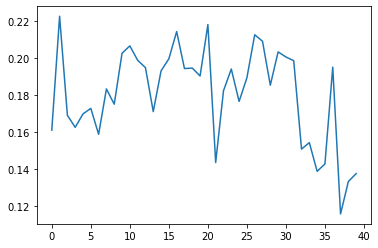

In [69]:
plt.plot(accuracy_list5)

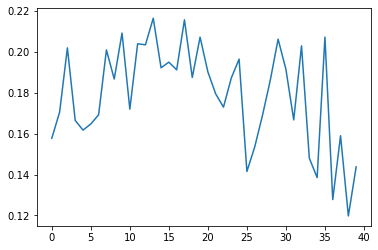

In [85]:
plt.plot(accuracy_list6)

In [86]:
accuracy_list5

[0.16099999845027924,
 0.2224999964237213,
 0.16899999976158142,
 0.16249999403953552,
 0.16975000500679016,
 0.17274999618530273,
 0.1587499976158142,
 0.18324999511241913,
 0.17499999701976776,
 0.20250000059604645,
 0.20649999380111694,
 0.19875000417232513,
 0.19474999606609344,
 0.17100000381469727,
 0.19300000369548798,
 0.19949999451637268,
 0.21424999833106995,
 0.19425000250339508,
 0.19449999928474426,
 0.1902499943971634,
 0.21799999475479126,
 0.14350000023841858,
 0.1822499930858612,
 0.1940000057220459,
 0.17649999260902405,
 0.18925000727176666,
 0.21250000596046448,
 0.20900000631809235,
 0.18524999916553497,
 0.2032500058412552,
 0.2004999965429306,
 0.19850000739097595,
 0.15074999630451202,
 0.15424999594688416,
 0.13875000178813934,
 0.14274999499320984,
 0.19499999284744263,
 0.11574999988079071,
 0.13324999809265137,
 0.13750000298023224]

In [87]:
accuracy_list6

[0.1577499955892563,
 0.1704999953508377,
 0.20200000703334808,
 0.1665000021457672,
 0.16175000369548798,
 0.16474999487400055,
 0.1692499965429306,
 0.20100000500679016,
 0.18674999475479126,
 0.20925000309944153,
 0.1720000058412552,
 0.20399999618530273,
 0.20350000262260437,
 0.21649999916553497,
 0.19224999845027924,
 0.19499999284744263,
 0.1912499964237213,
 0.21574999392032623,
 0.1875,
 0.20724999904632568,
 0.1902499943971634,
 0.17949999868869781,
 0.17299999296665192,
 0.18725000321865082,
 0.1965000033378601,
 0.14149999618530273,
 0.1535000056028366,
 0.16899999976158142,
 0.1862500011920929,
 0.20624999701976776,
 0.1914999932050705,
 0.1667499989271164,
 0.2029999941587448,
 0.14800000190734863,
 0.13850000500679016,
 0.20724999904632568,
 0.1277499943971634,
 0.1589999943971634,
 0.1197500005364418,
 0.14374999701976776]

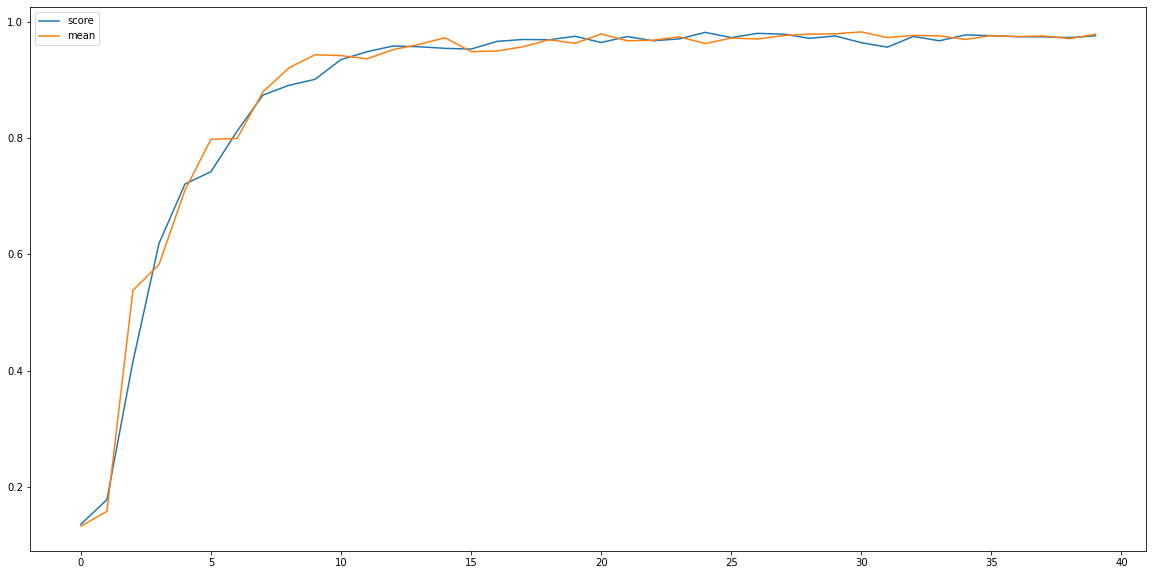

In [83]:
plt.figure(figsize=(20,10))
plt.plot(accuracy_list)
plt.plot(accuracy_list2)
plt.legend(['score','mean'])

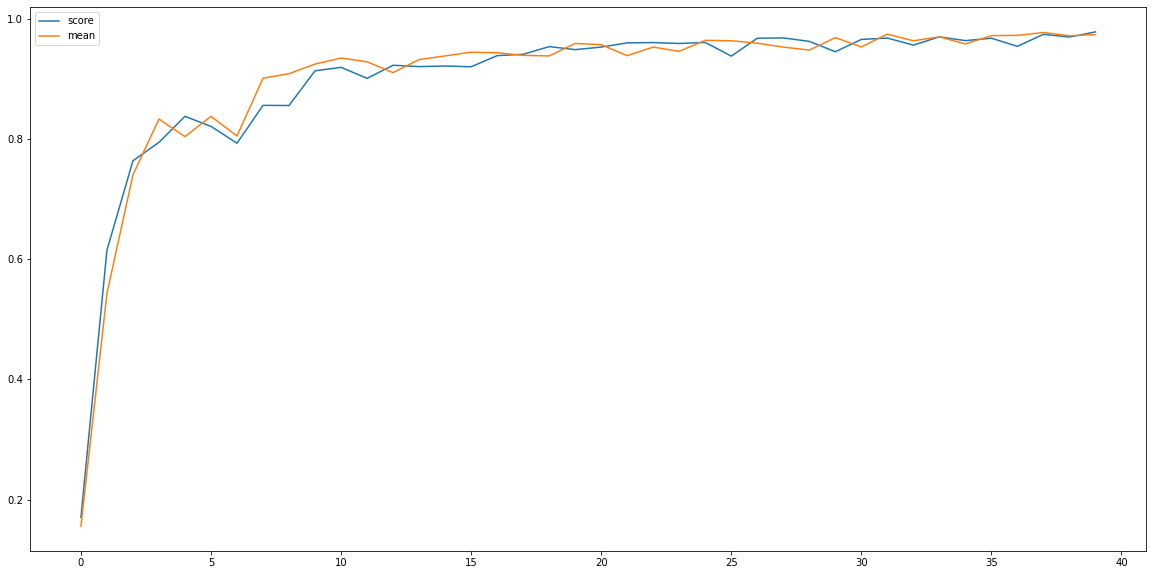

In [82]:
plt.figure(figsize=(20,10))
plt.plot(accuracy_list3)
plt.plot(accuracy_list4)
plt.legend(['score','mean'])

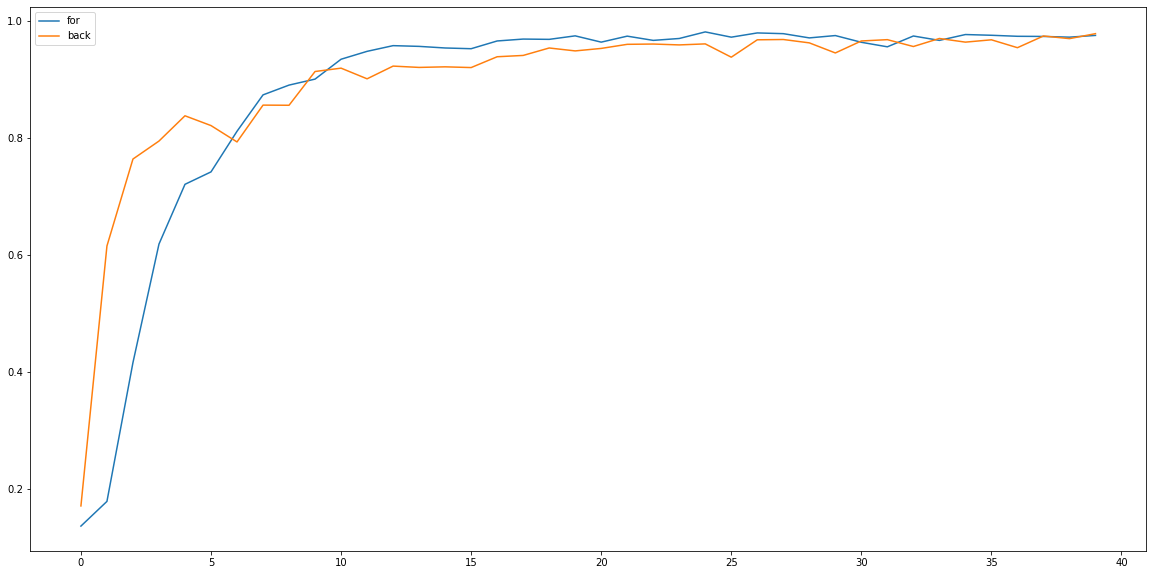

In [78]:
plt.figure(figsize=(20,10))
plt.plot(accuracy_list)
plt.plot(accuracy_list3)
plt.legend(['for', 'back'])

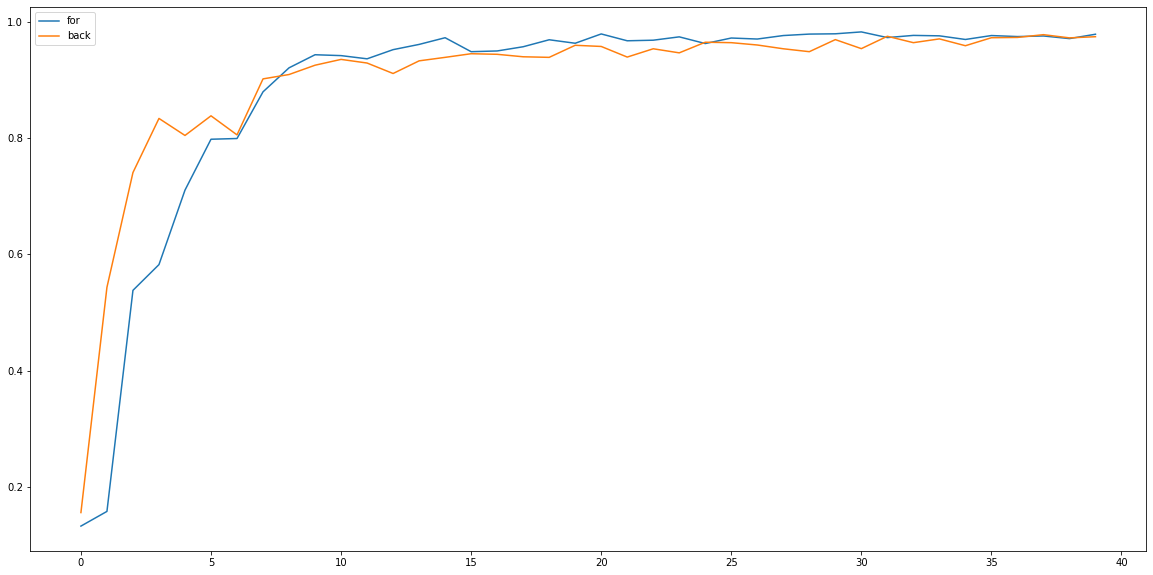

In [79]:
plt.figure(figsize=(20,10))
plt.plot(accuracy_list2)
plt.plot(accuracy_list4)
plt.legend(['for', 'back'])

In [ ]:
#1~10 cable만 가지고 5일때 측정